# Final Exercise #

- Using numpy, generate a time series of 365 days simulating how many daily visitors a park gets. There must be a trend representing a growth in popularity over time, with an overall mean of 2000 visitors and a standard deviation of 500
- Create a pandas DataFrame using dates as indices and visitors as the column
- Calculate the mean of visitors per month and the corresponding standard deviation
- Create a line graph displaying the change in daily visitors over time, then add to it the weekly moving average. Moreover, create another graph showing the monthly mean for visitors.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
days = 365
mean = 2000
sd = 500
seed = 12345
daily_growth = 0.001

In [133]:
np.random.seed(seed)
standard_distribution = np.random.normal(0, 1, days)  # generate the normal errors
scaling_factors = np.linspace(1,1+daily_growth*(days-1),days)  # factors by which they grow over time
scaled_distribution = standard_distribution*scaling_factors  # scale the errors
normal_scaled_distribution = (scaled_distribution-np.mean(scaled_distribution))/np.std(scaled_distribution)  # re-standardize
visitor_distribution = mean + normal_scaled_distribution*sd  # final visitor distribution with a growing trend respecting given distribution

In [134]:
dictionary = {'visitors': visitor_distribution}
dataframe = pd.DataFrame(dictionary)
dataframe.head()

,visitors
0,1926.980864
1,2218.451559
2,1792.448407
3,1776.718837
4,2855.058330


In [135]:
months = [0,31,28,31,30,31,30,31,31,30,31,30,31]
cumsum_months = np.cumsum(months)  # output: array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334, 365])
monthly_visitor_mean = []
monthly_visitor_sd = []
for i in range(12):
    section = dataframe['visitors'][cumsum_months[i]:cumsum_months[i+1]]
    monthly_visitor_mean.append(section.mean())
    monthly_visitor_sd.append(section.std())
for i in range(12):
    print(f"Month: {i+1}, visitor mean: {monthly_visitor_mean[i]:.3f}, visitor standard deviation: {monthly_visitor_sd[i]:.3f}")

Month: 1, visitor mean: 2145.520, visitor standard deviation: 459.107
Month: 2, visitor mean: 1839.814, visitor standard deviation: 462.809
Month: 3, visitor mean: 2012.450, visitor standard deviation: 431.062
Month: 4, visitor mean: 2037.408, visitor standard deviation: 457.145
Month: 5, visitor mean: 1989.744, visitor standard deviation: 427.280
Month: 6, visitor mean: 2024.926, visitor standard deviation: 552.017
Month: 7, visitor mean: 1976.127, visitor standard deviation: 516.040
Month: 8, visitor mean: 1950.779, visitor standard deviation: 529.963
Month: 9, visitor mean: 1912.438, visitor standard deviation: 499.531
Month: 10, visitor mean: 1934.034, visitor standard deviation: 515.035
Month: 11, visitor mean: 2105.656, visitor standard deviation: 636.390
Month: 12, visitor mean: 2058.197, visitor standard deviation: 499.986


In [136]:
print(np.std(dataframe['visitors'][:]))
print(np.mean(dataframe['visitors'][:]))

500.00000000000006
2000.0


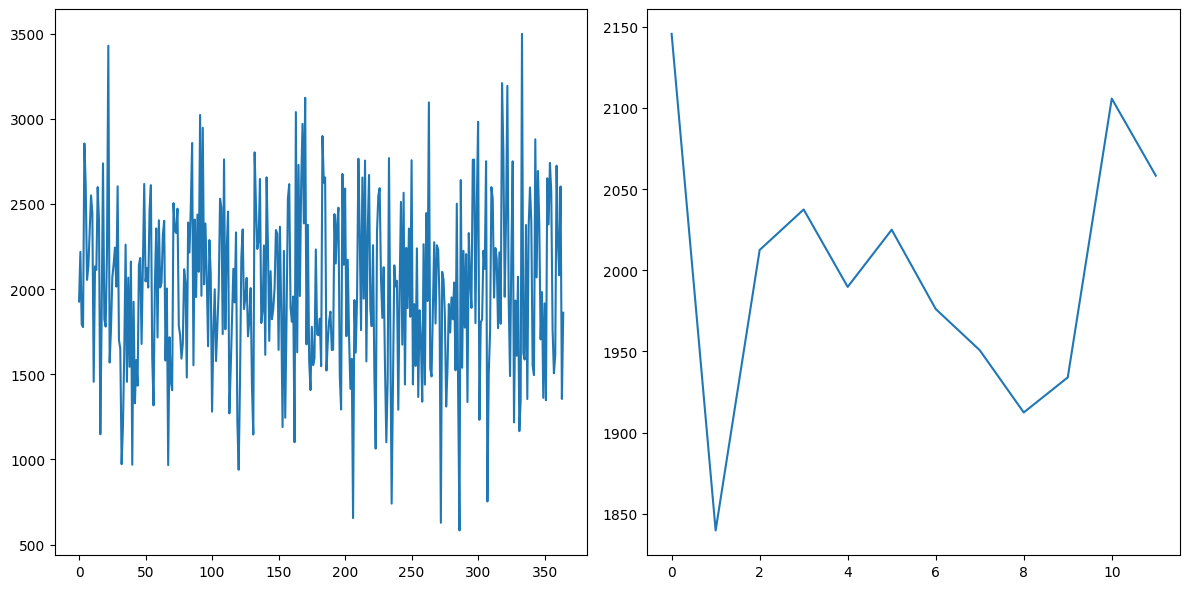

In [137]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(range(days), visitor_distribution)
plt.xticks()
plt.yticks()
plt.xlim()
plt.ylim()
plt.title("")
plt.xlabel("")
plt.ylabel("")

# ADD MOVING AVERAGE TO FIRST GRAPH
# FIX TREND (doesn't show right now, something's wrong probably)

plt.subplot(1,2,2)
plt.plot(range(12), monthly_visitor_mean)
plt.xticks()
plt.yticks()
plt.xlim()
plt.ylim()
plt.title("")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()